# Project-2 : Skin Disorder Detection

## Aim : Here we aim do the following tasks:
## (1) Task:1 Determine which features is impacting for a particular skin disorder (for all classes)
## (2) Task2:-Create a machine learning model which will predict the disorder available.
## (3) Task:3:-Perform the EDA and show the trend of the disease.

In [1]:
import pandas as pd
import numpy as np
import warnings 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
import xgboost
import lightgbm as lgbm
import time

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.experimental import enable_hist_gradient_boosting,enable_iterative_imputer,enable_halving_search_cv
from sklearn.ensemble import ExtraTreesClassifier,HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, scale, Normalizer
from sklearn.feature_selection import chi2, SelectKBest,RFECV

from random import sample
from scipy.stats import boxcox, skew, norm, kurtosis
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

C:\Users\Munj Patel\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
sns.set_style(style = 'darkgrid')
plt.rcParams['figure.figsize'] = 10,10
warnings.filterwarnings('ignore')

In [3]:
na_l = ['NaN','nan','NAN','--','?','-',' ']

df = pd.read_csv(r"C:\Users\Munj Patel\Desktop\INTERNSHIP\DATA_MITES\PROJECT_2\PRCP-1027-SkinDisorderDetection\dataset_35_dermatology.csv", na_values=na_l)
df.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3


In [4]:
df.shape

(366, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   erythema                                  366 non-null    int64  
 1   scaling                                   366 non-null    int64  
 2   definite_borders                          366 non-null    int64  
 3   itching                                   366 non-null    int64  
 4   koebner_phenomenon                        366 non-null    int64  
 5   polygonal_papules                         366 non-null    int64  
 6   follicular_papules                        366 non-null    int64  
 7   oral_mucosal_involvement                  366 non-null    int64  
 8   knee_and_elbow_involvement                366 non-null    int64  
 9   scalp_involvement                         366 non-null    int64  
 10  family_history                        

In [6]:
df.dtypes

erythema                                      int64
scaling                                       int64
definite_borders                              int64
itching                                       int64
koebner_phenomenon                            int64
polygonal_papules                             int64
follicular_papules                            int64
oral_mucosal_involvement                      int64
knee_and_elbow_involvement                    int64
scalp_involvement                             int64
family_history                                int64
melanin_incontinence                          int64
eosinophils_in_the_infiltrate                 int64
PNL_infiltrate                                int64
fibrosis_of_the_papillary_dermis              int64
exocytosis                                    int64
acanthosis                                    int64
hyperkeratosis                                int64
parakeratosis                                 int64
clubbing_of_

In [7]:
df.describe()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,358.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,36.296089,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,15.324557,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,49.750000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000,6.000000


In [8]:
for q in df.drop('Age',axis=1).columns:
    print(f'Number of unique elements in {q}: {sorted(df[q].unique())}.')

Number of unique elements in erythema: [0, 1, 2, 3].
Number of unique elements in scaling: [0, 1, 2, 3].
Number of unique elements in definite_borders: [0, 1, 2, 3].
Number of unique elements in itching: [0, 1, 2, 3].
Number of unique elements in koebner_phenomenon: [0, 1, 2, 3].
Number of unique elements in polygonal_papules: [0, 1, 2, 3].
Number of unique elements in follicular_papules: [0, 1, 2, 3].
Number of unique elements in oral_mucosal_involvement: [0, 1, 2, 3].
Number of unique elements in knee_and_elbow_involvement: [0, 1, 2, 3].
Number of unique elements in scalp_involvement: [0, 1, 2, 3].
Number of unique elements in family_history: [0, 1].
Number of unique elements in melanin_incontinence: [0, 1, 2, 3].
Number of unique elements in eosinophils_in_the_infiltrate: [0, 1, 2].
Number of unique elements in PNL_infiltrate: [0, 1, 2, 3].
Number of unique elements in fibrosis_of_the_papillary_dermis: [0, 1, 2, 3].
Number of unique elements in exocytosis: [0, 1, 2, 3].
Number of un

## EDA

## Finding and dropping the dupliacate values

In [9]:
df[df.duplicated() == True]

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class


## Missing Value Treatment

In [10]:
df.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

<AxesSubplot:>

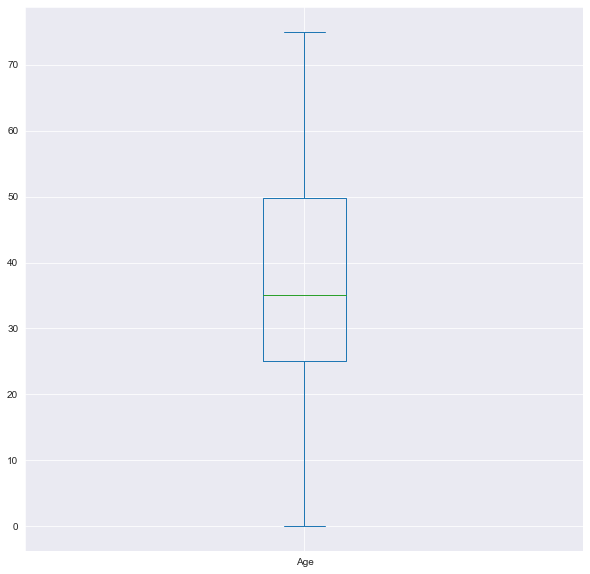

In [11]:
df['Age'].plot(kind = 'box')

### No outliers detected so mean values can be imputed with the mean of the variable...

In [12]:
df['Age'] = df['Age'].fillna(value = df['Age'].mean())
df

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25.0,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36.0,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28.0,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50.0,3


## Analysis of discrete variables

Frequency bar plot and pie chart for erythema: 




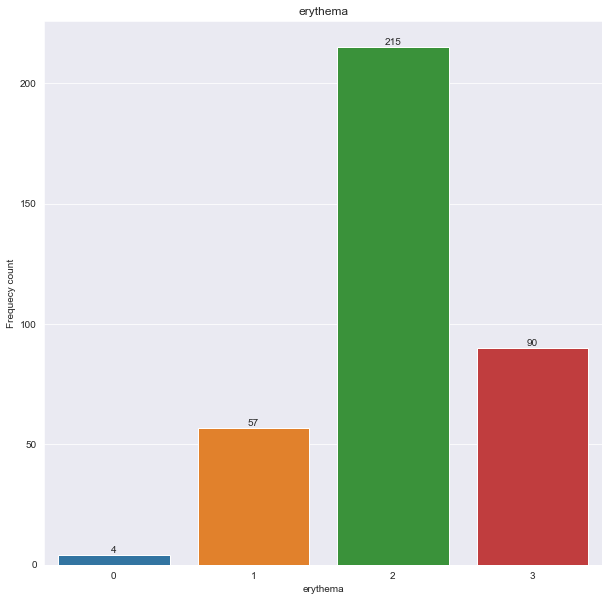

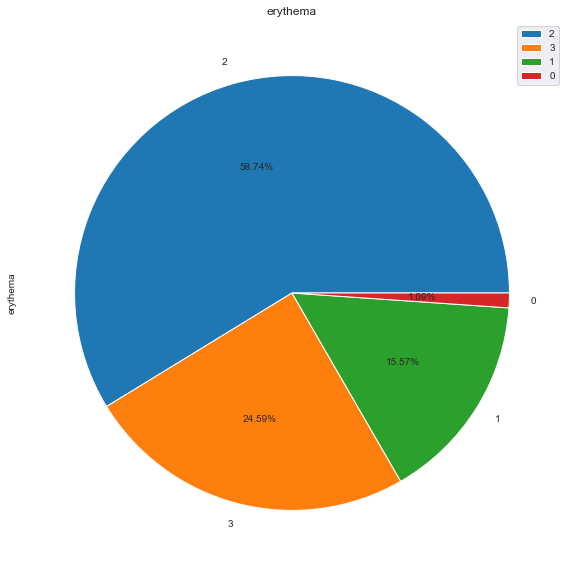

Frequency bar plot and pie chart for scaling: 




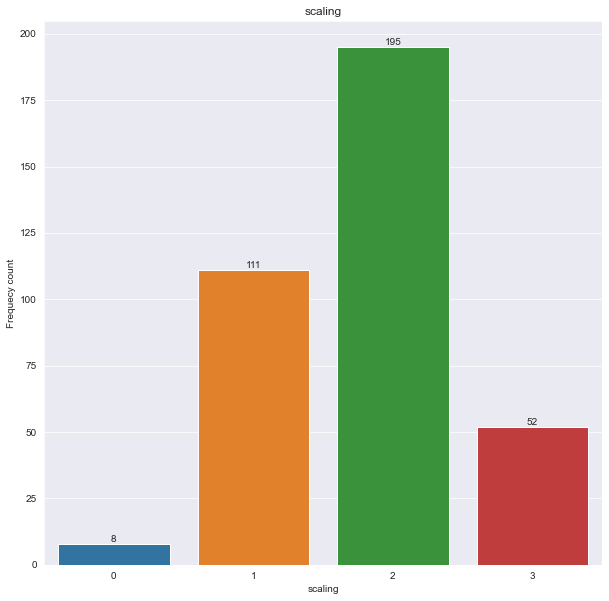

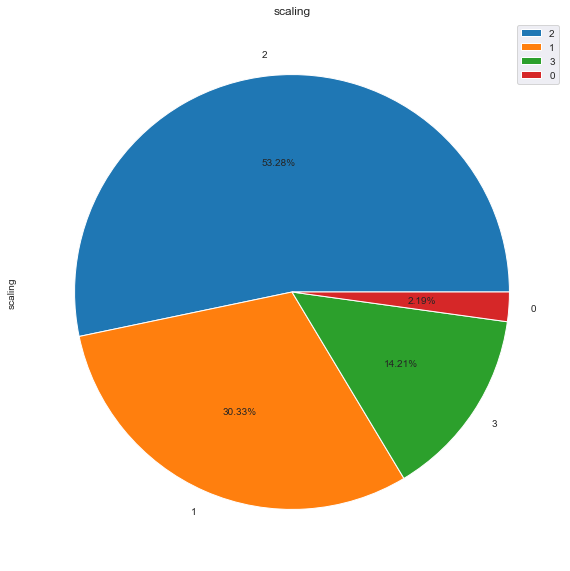

Frequency bar plot and pie chart for definite_borders: 




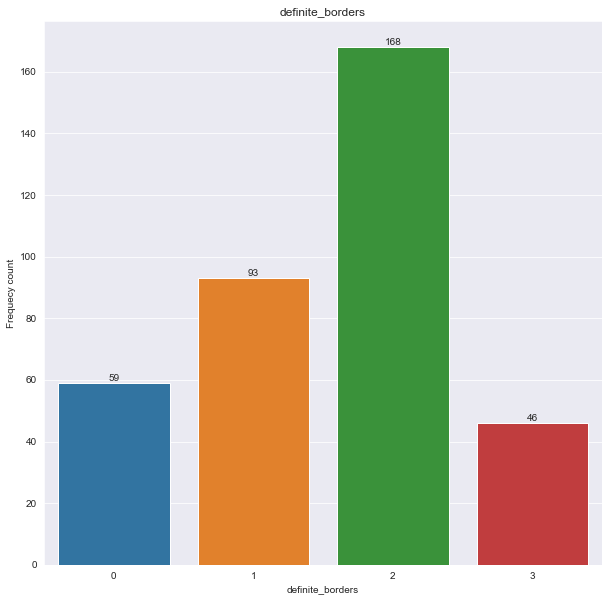

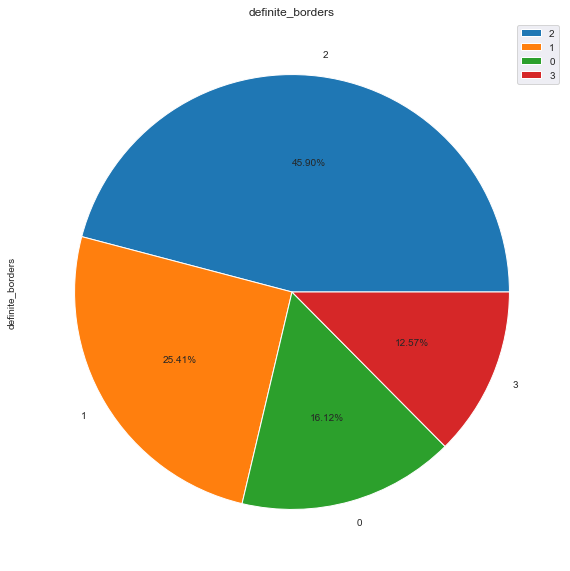

Frequency bar plot and pie chart for itching: 




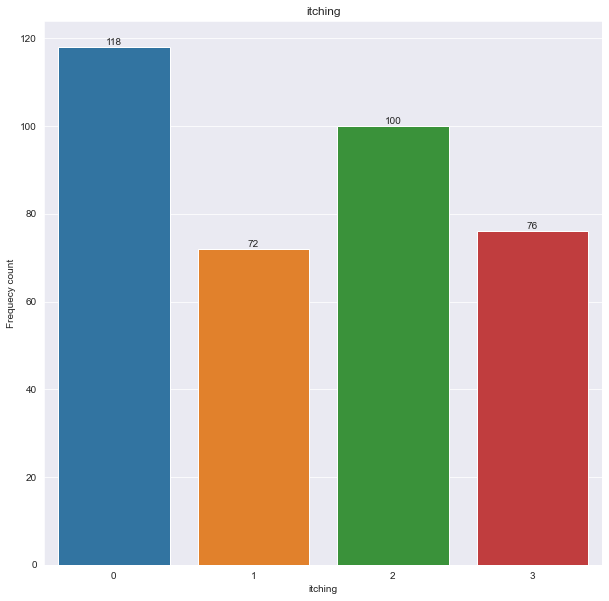

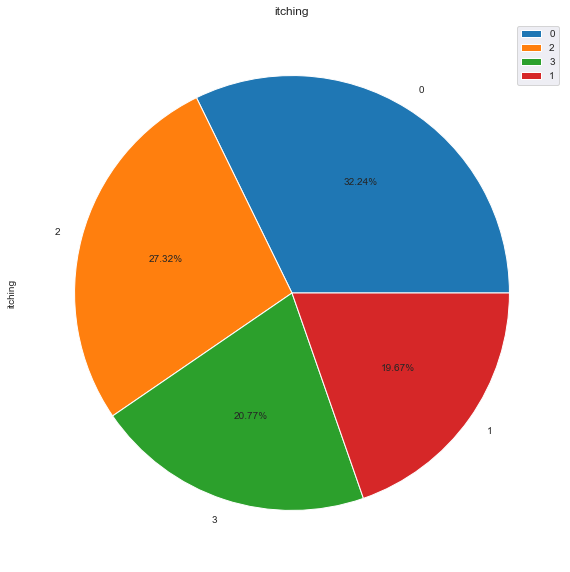

Frequency bar plot and pie chart for koebner_phenomenon: 




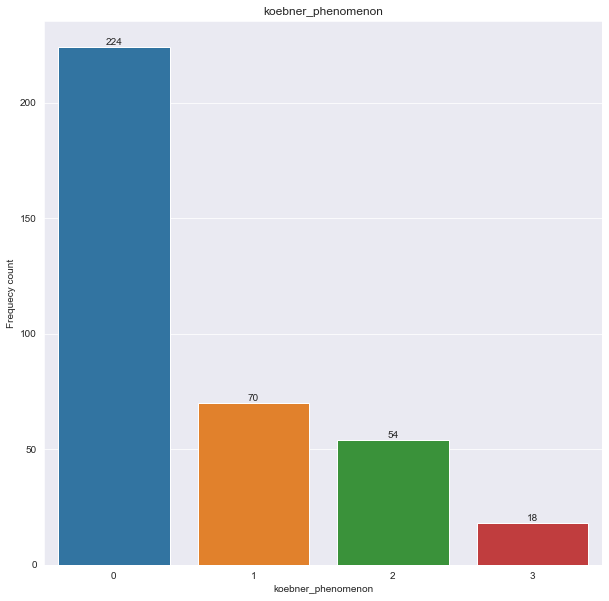

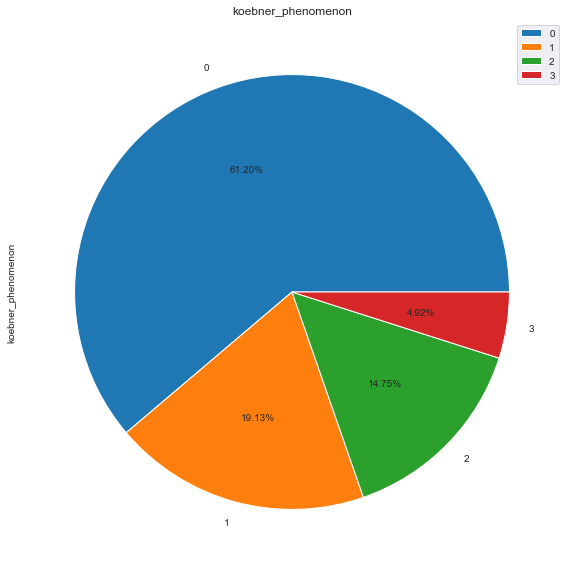

Frequency bar plot and pie chart for polygonal_papules: 




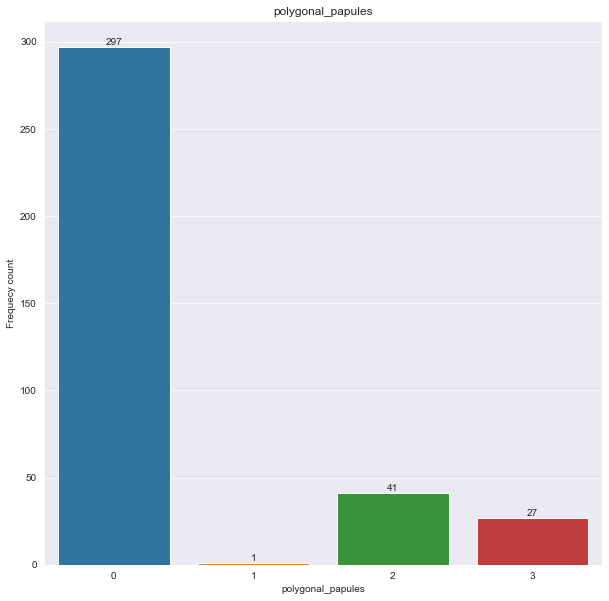

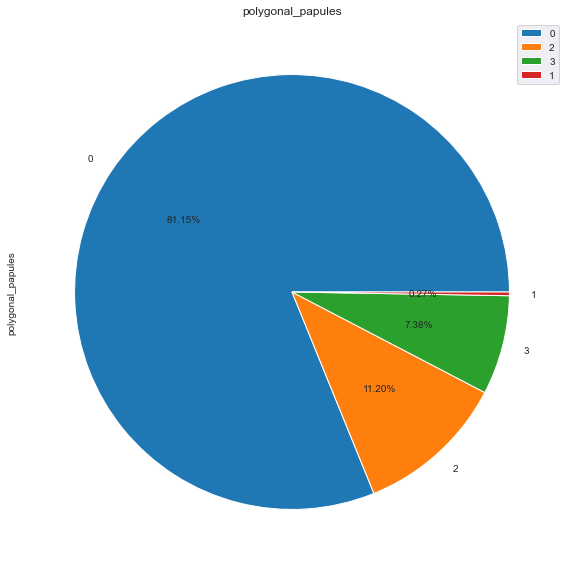

Frequency bar plot and pie chart for follicular_papules: 




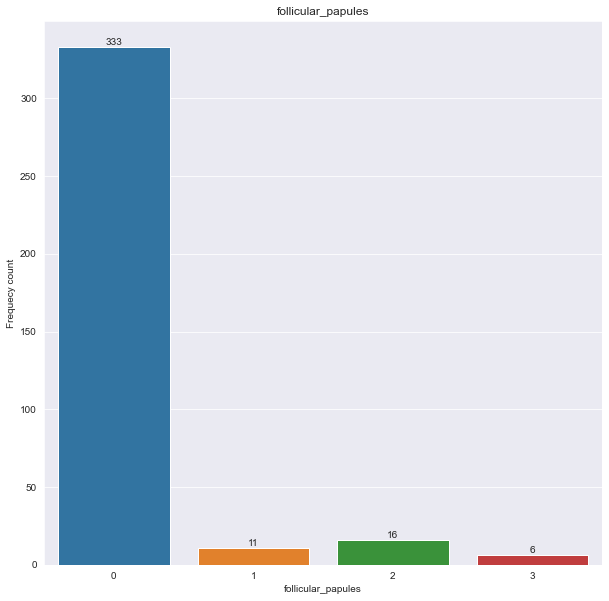

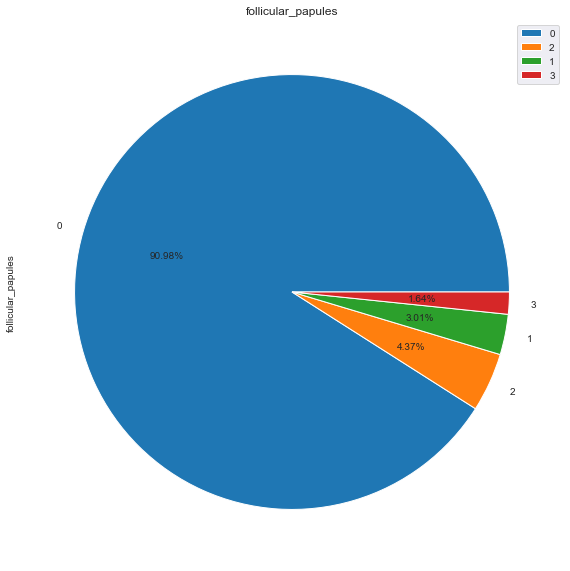

Frequency bar plot and pie chart for oral_mucosal_involvement: 




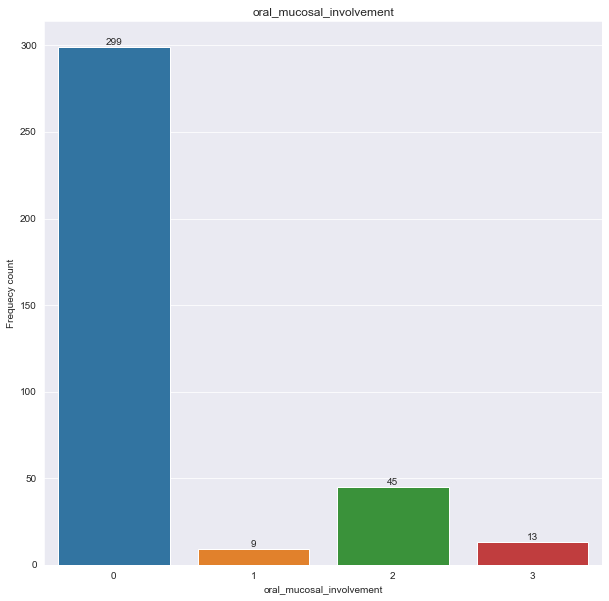

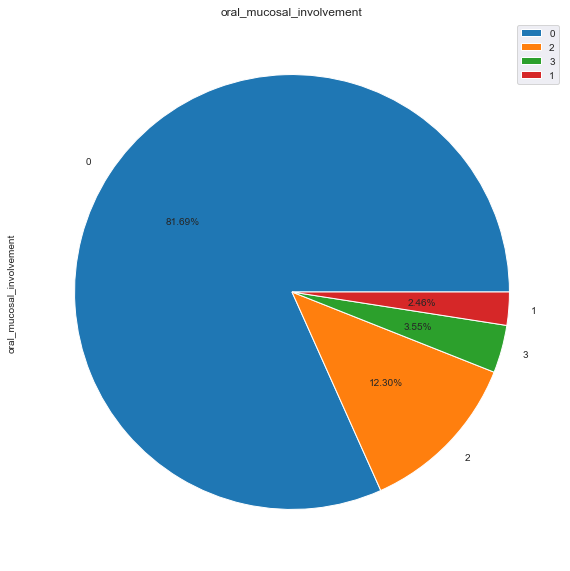

Frequency bar plot and pie chart for knee_and_elbow_involvement: 




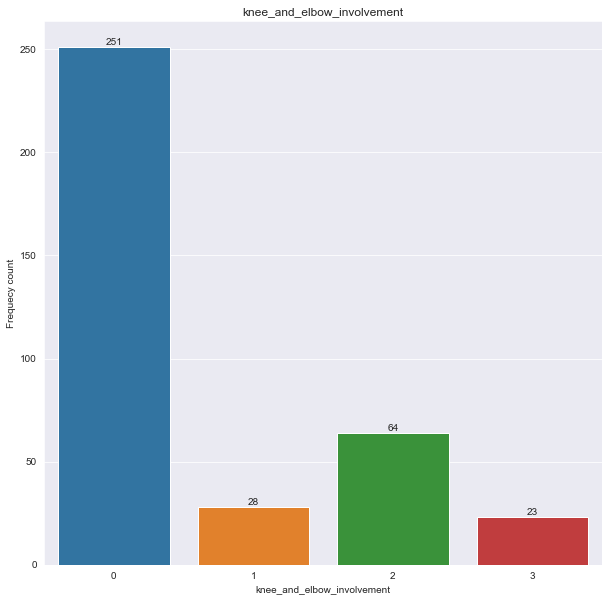

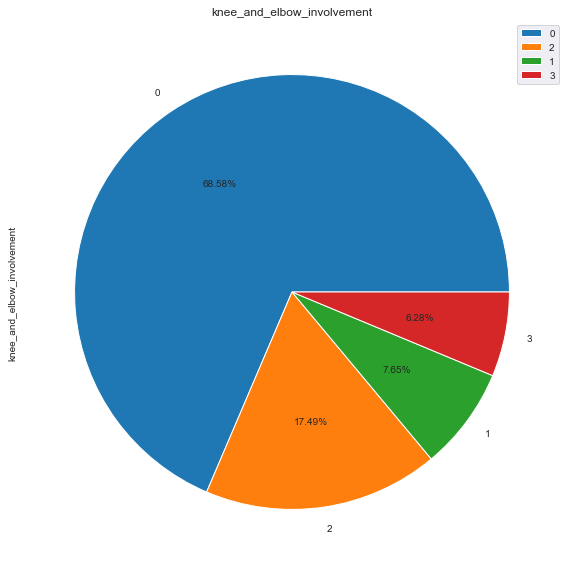

Frequency bar plot and pie chart for scalp_involvement: 




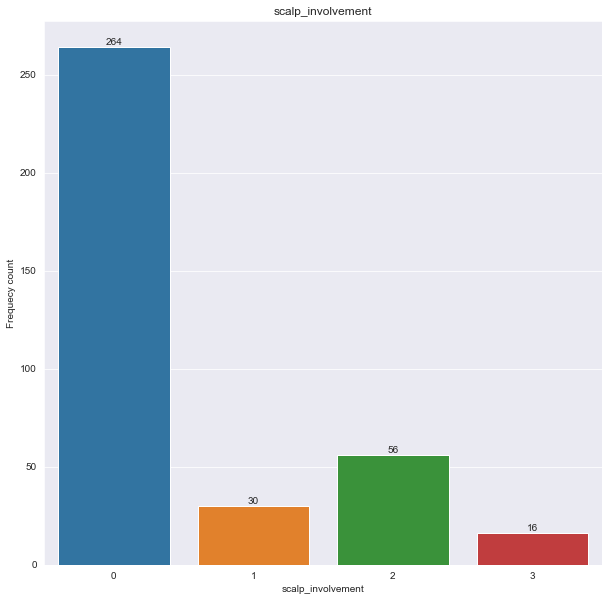

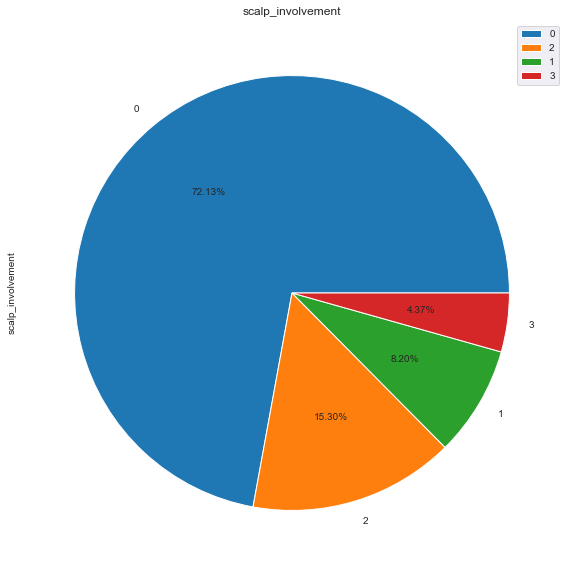

Frequency bar plot and pie chart for family_history: 




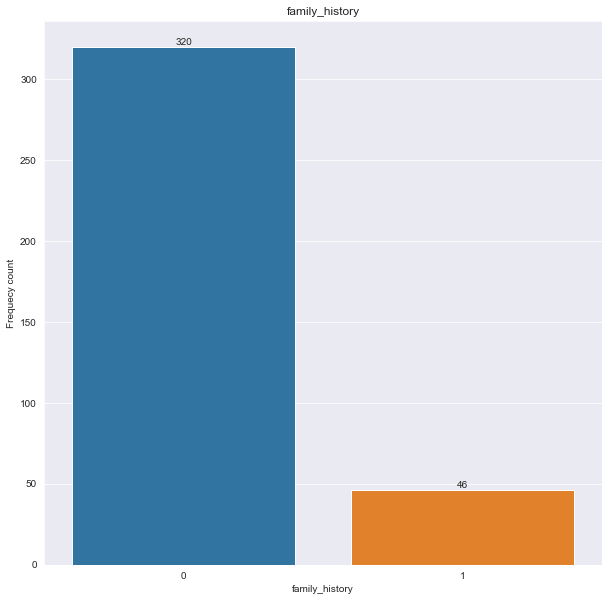

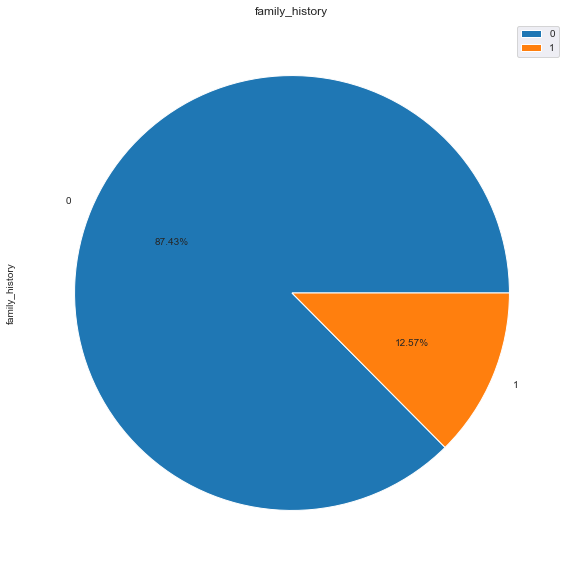

Frequency bar plot and pie chart for melanin_incontinence: 




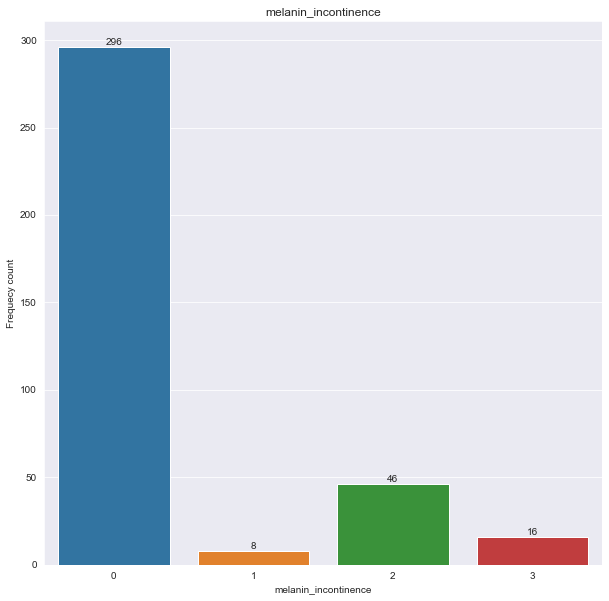

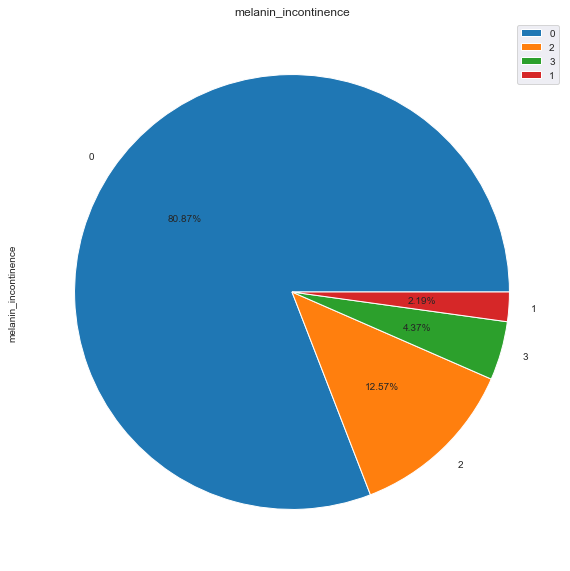

Frequency bar plot and pie chart for eosinophils_in_the_infiltrate: 




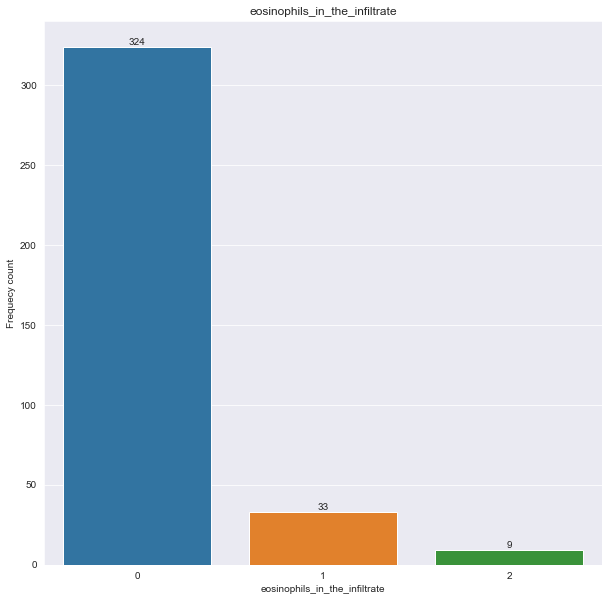

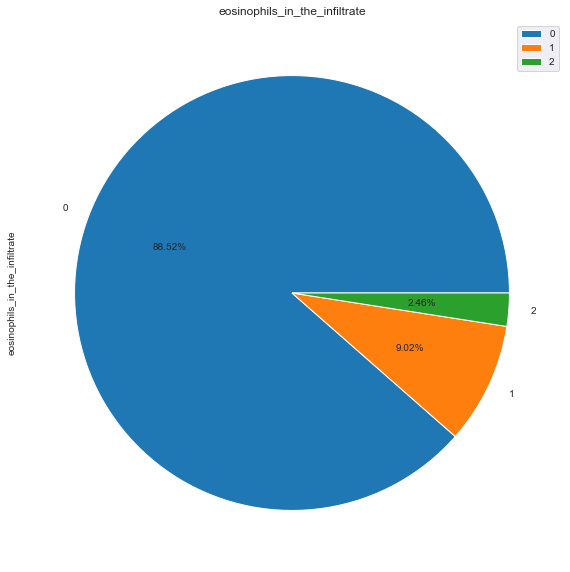

Frequency bar plot and pie chart for PNL_infiltrate: 




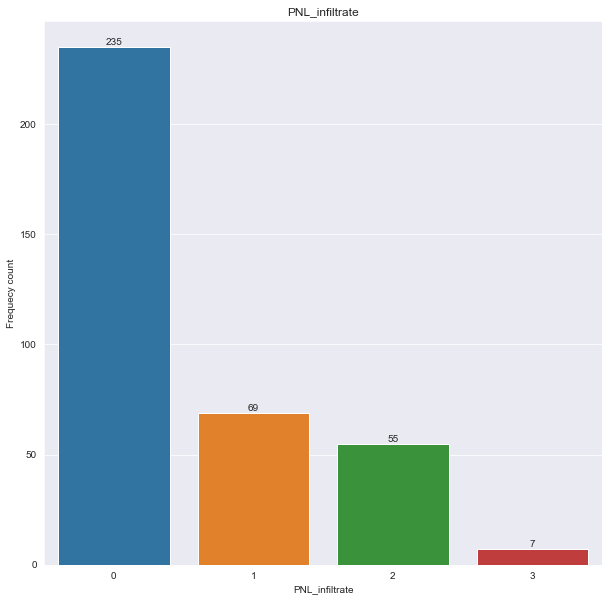

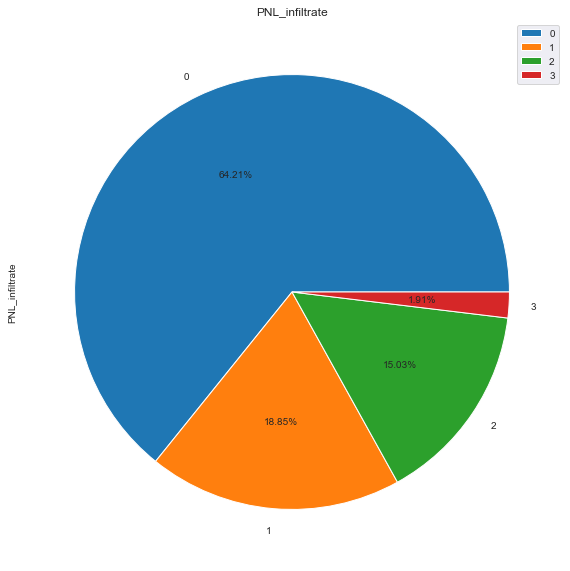

Frequency bar plot and pie chart for fibrosis_of_the_papillary_dermis: 




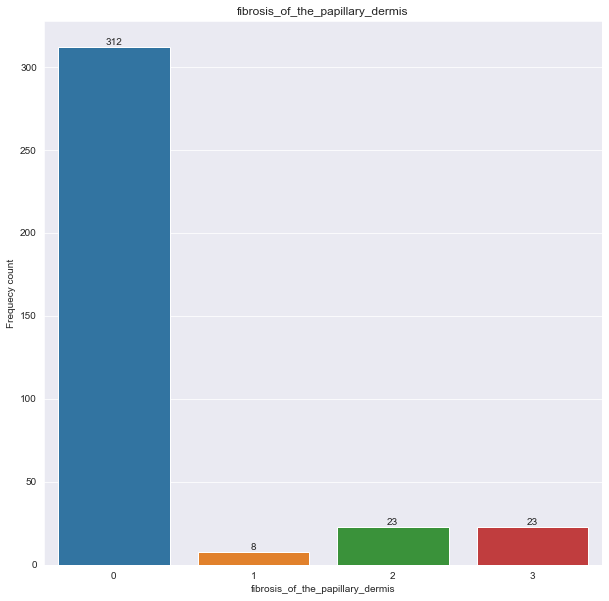

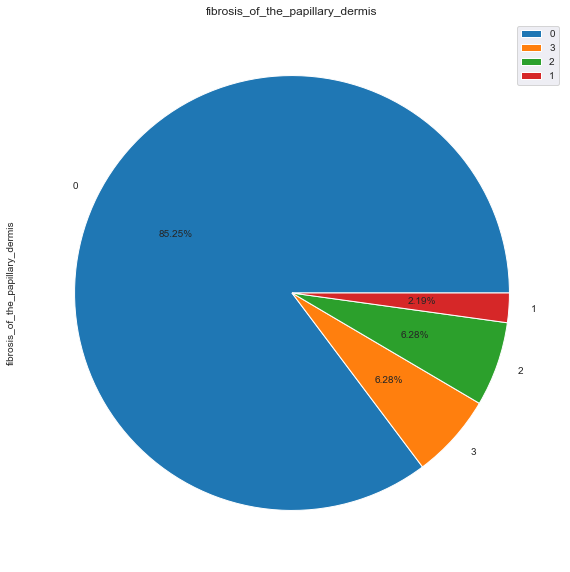

Frequency bar plot and pie chart for exocytosis: 




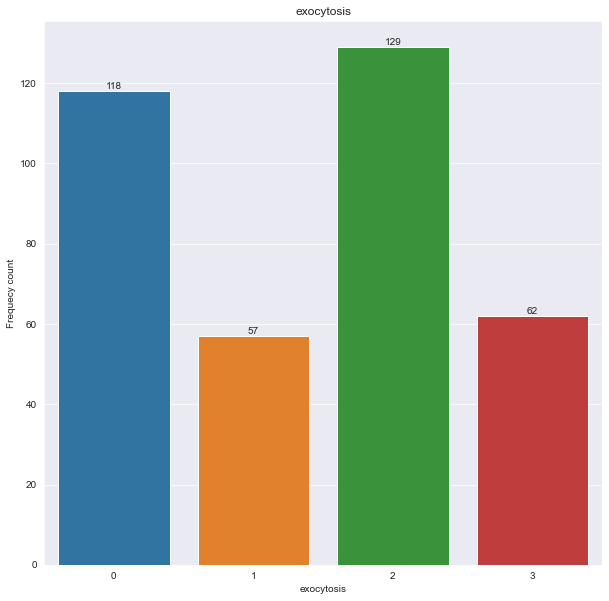

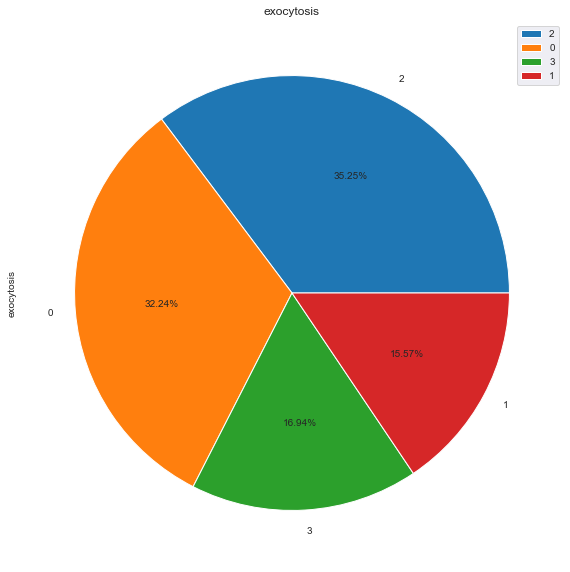

Frequency bar plot and pie chart for acanthosis: 




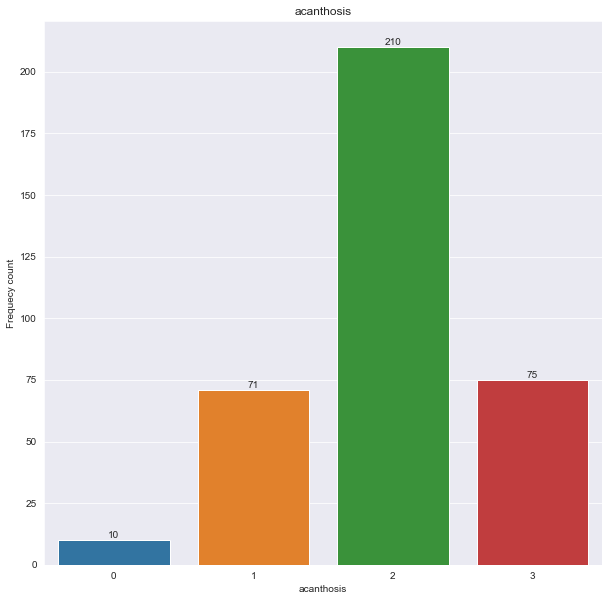

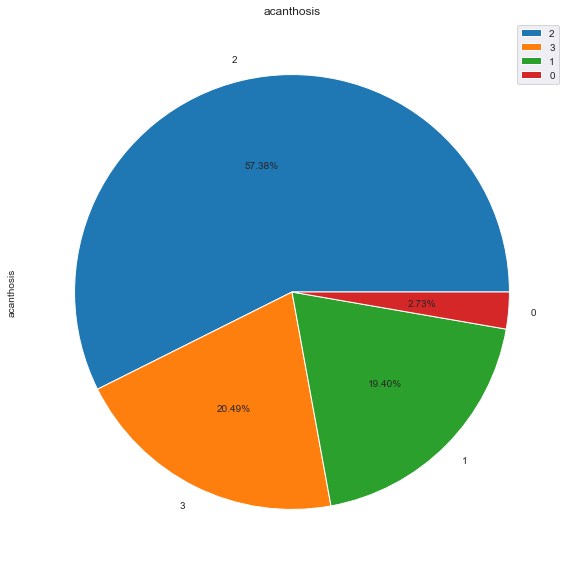

Frequency bar plot and pie chart for hyperkeratosis: 




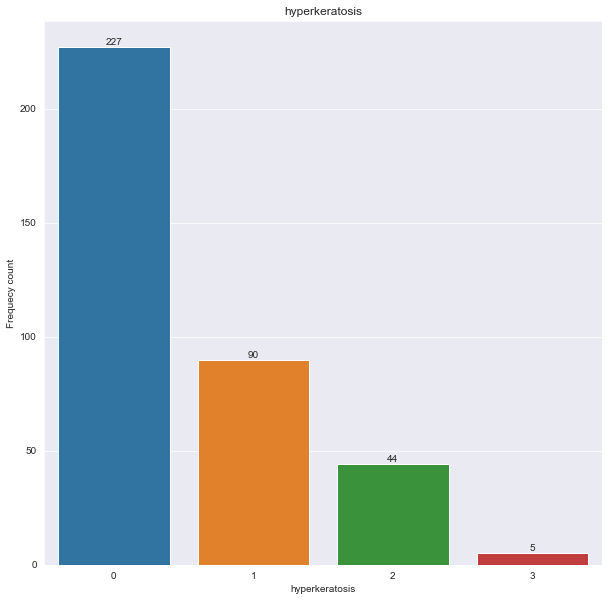

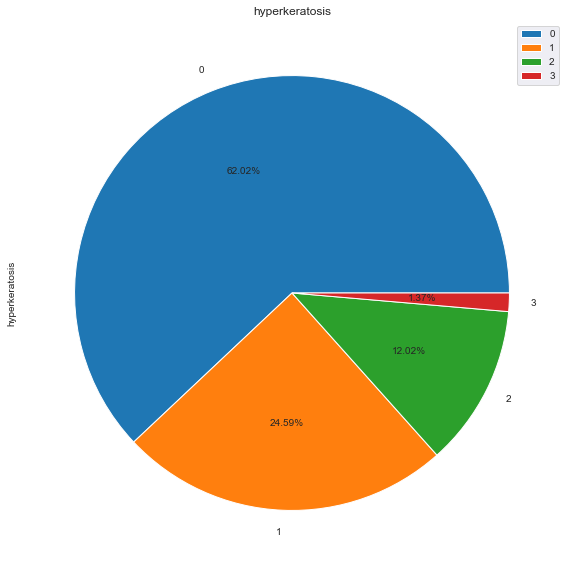

Frequency bar plot and pie chart for parakeratosis: 




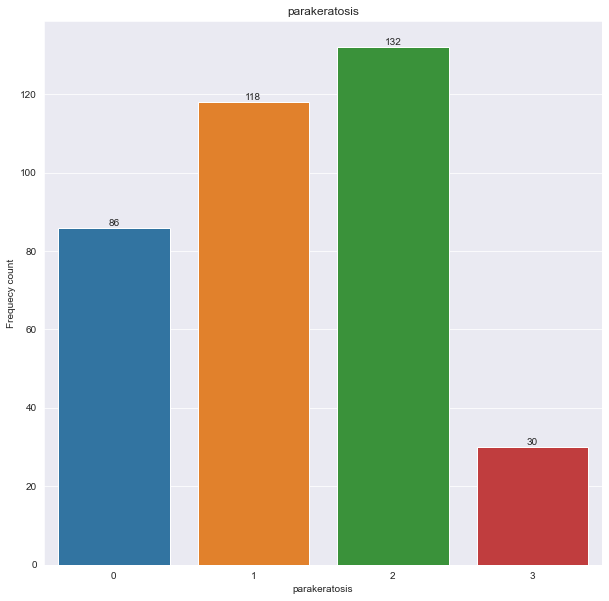

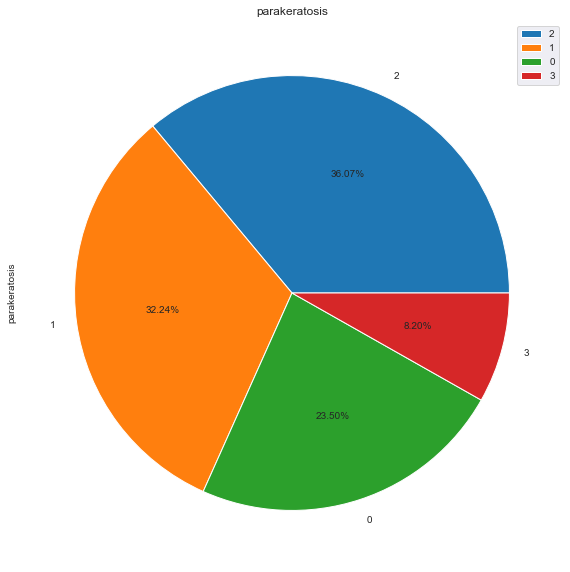

Frequency bar plot and pie chart for clubbing_of_the_rete_ridges: 




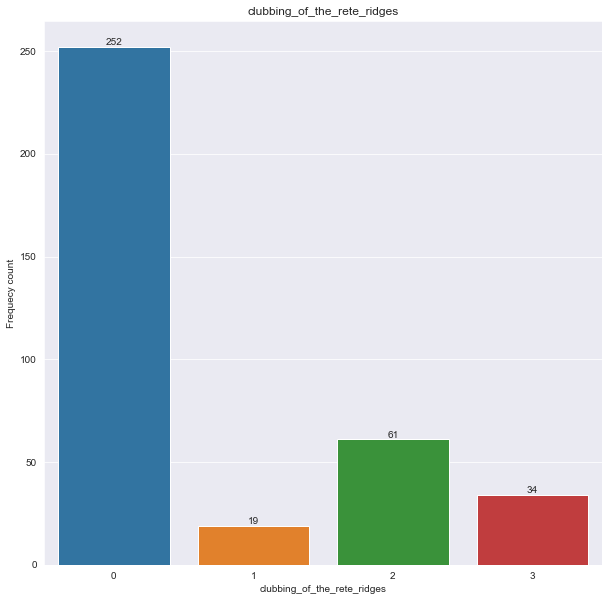

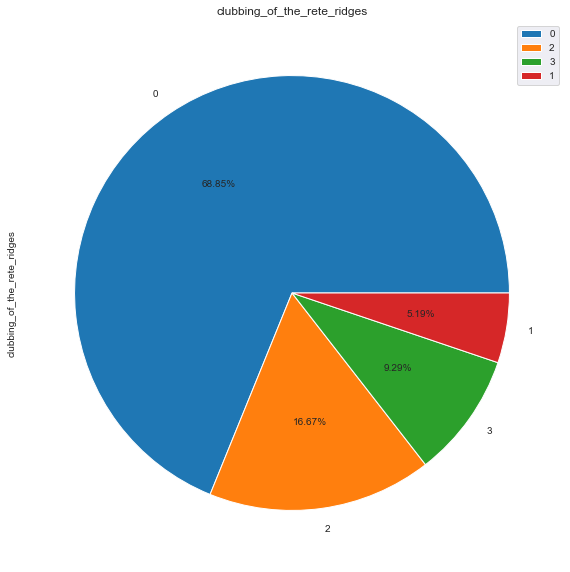

Frequency bar plot and pie chart for elongation_of_the_rete_ridges: 




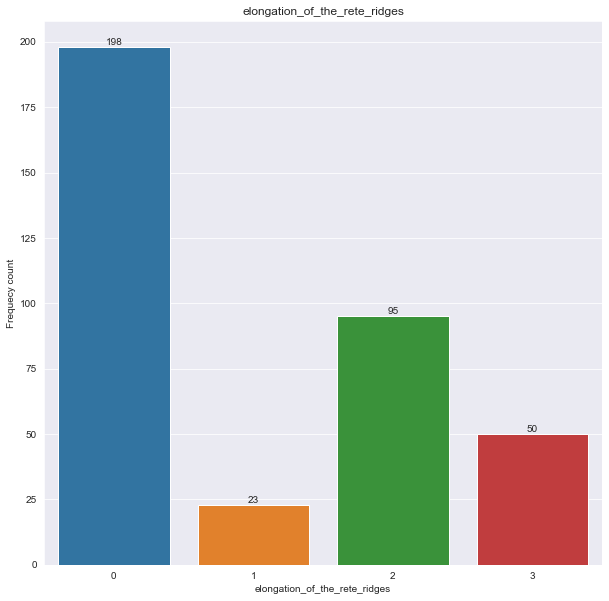

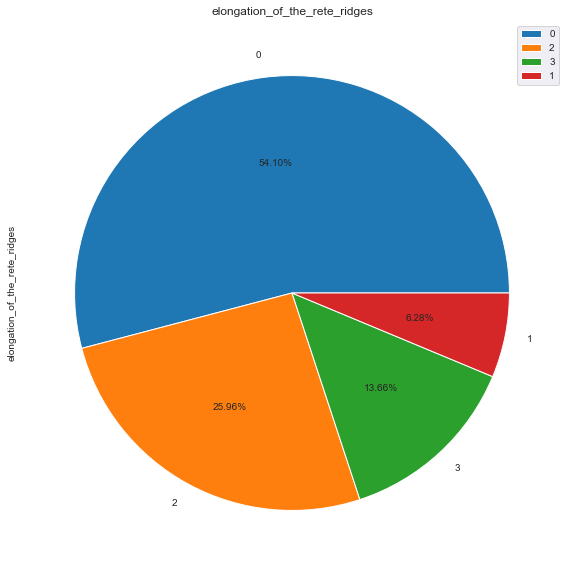

Frequency bar plot and pie chart for thinning_of_the_suprapapillary_epidermis: 




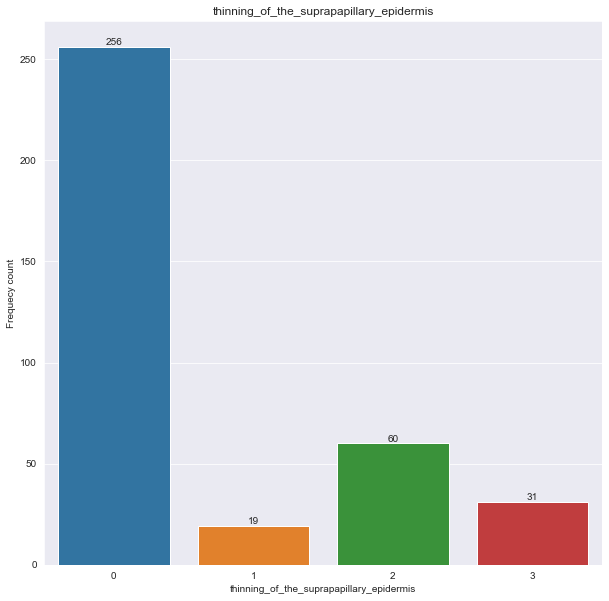

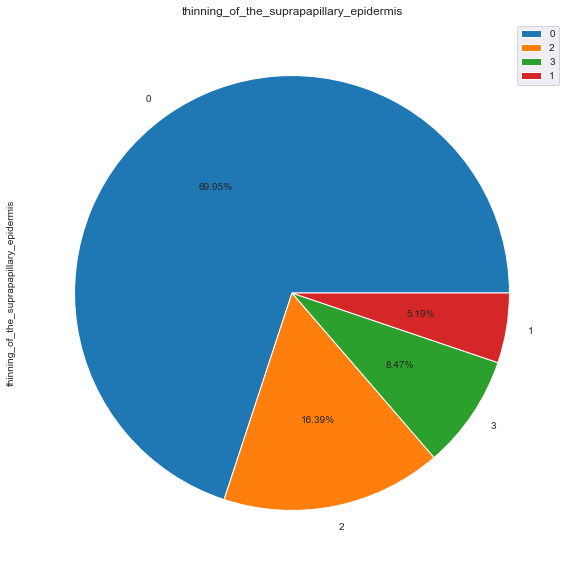

Frequency bar plot and pie chart for spongiform_pustule: 




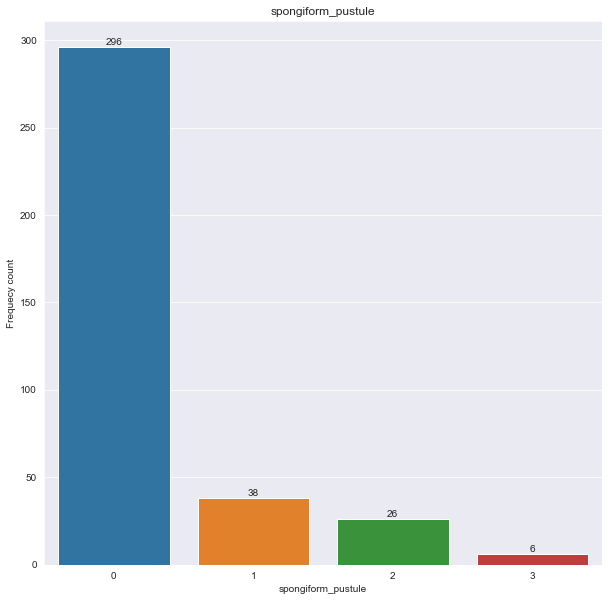

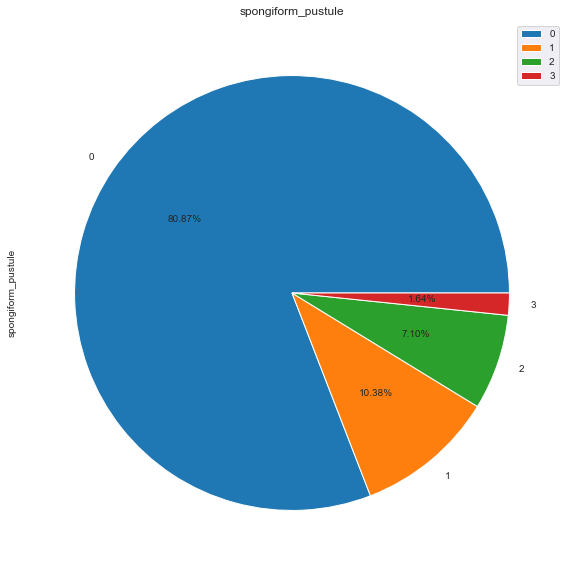

Frequency bar plot and pie chart for munro_microabcess: 




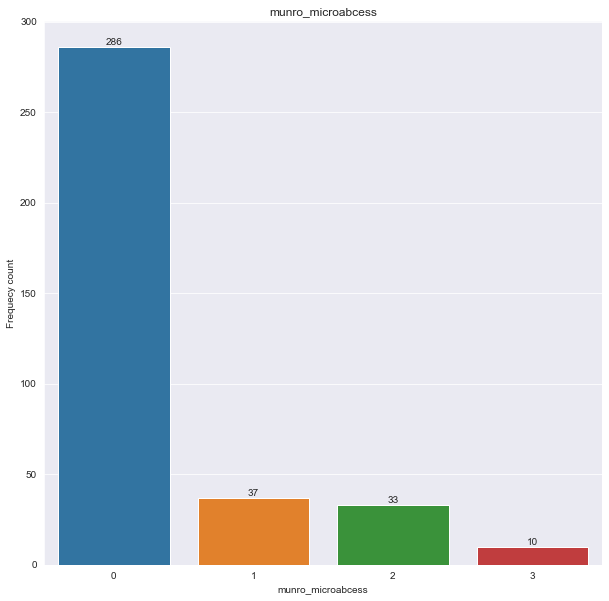

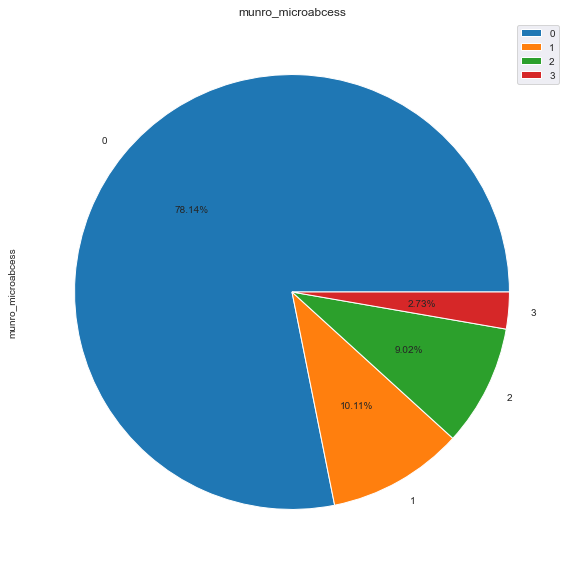

Frequency bar plot and pie chart for focal_hypergranulosis: 




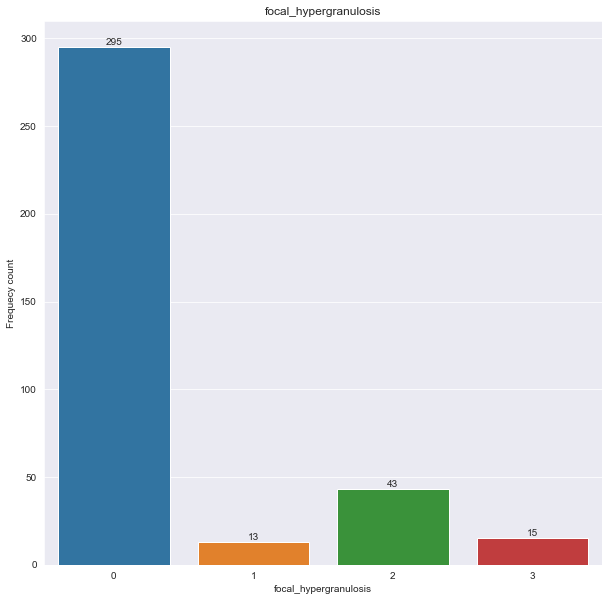

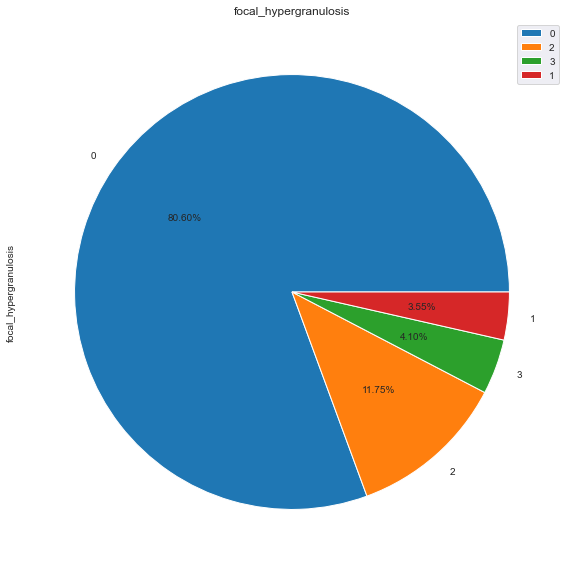

Frequency bar plot and pie chart for disappearance_of_the_granular_layer: 




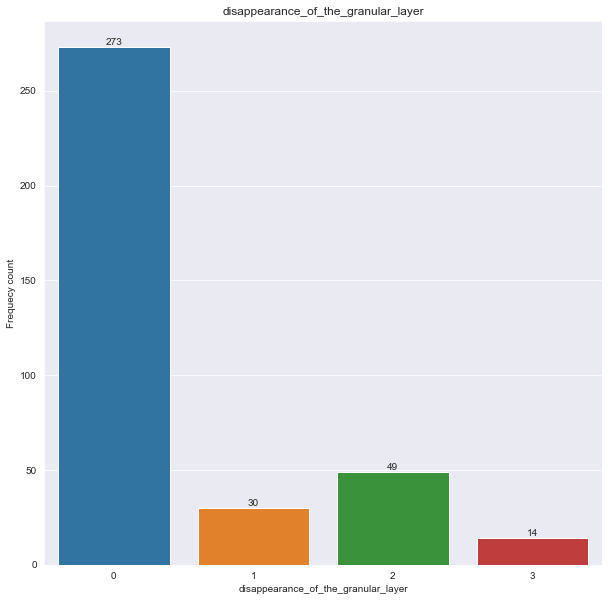

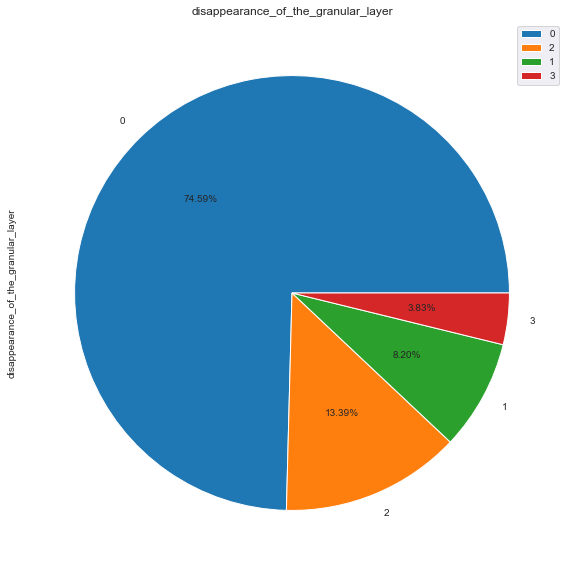

Frequency bar plot and pie chart for vacuolisation_and_damage_of_basal_layer: 




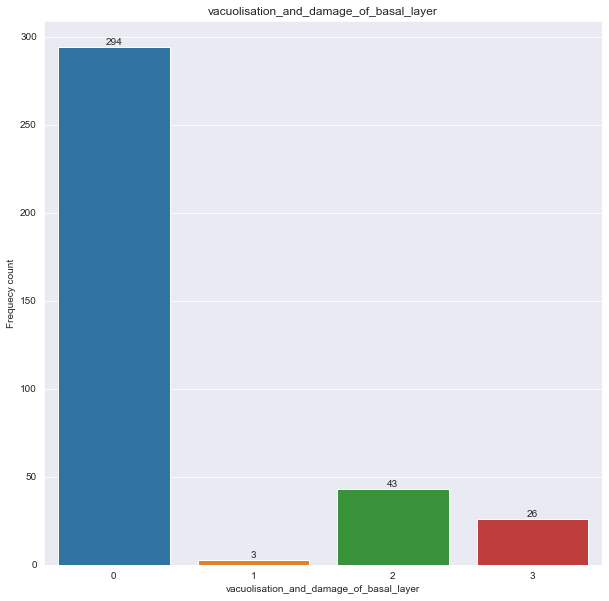

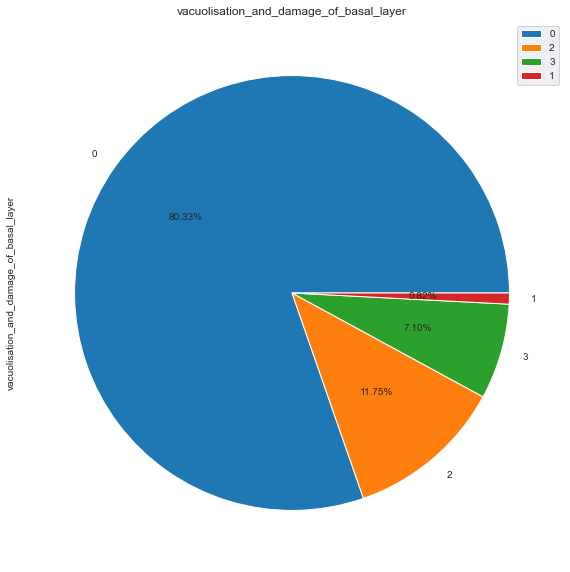

Frequency bar plot and pie chart for spongiosis: 




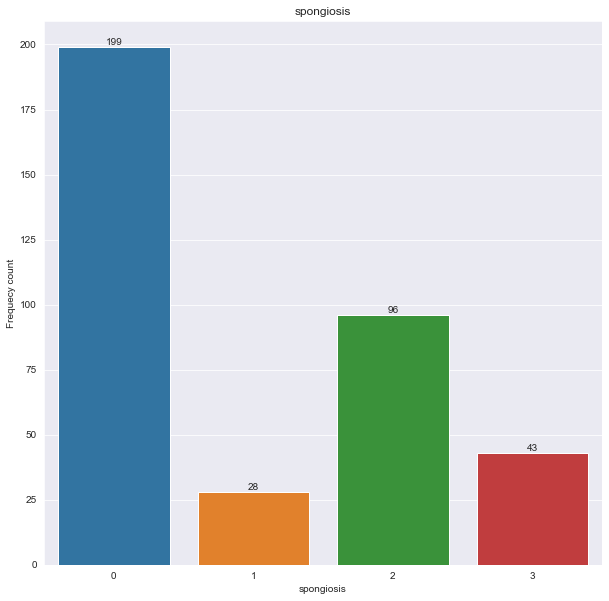

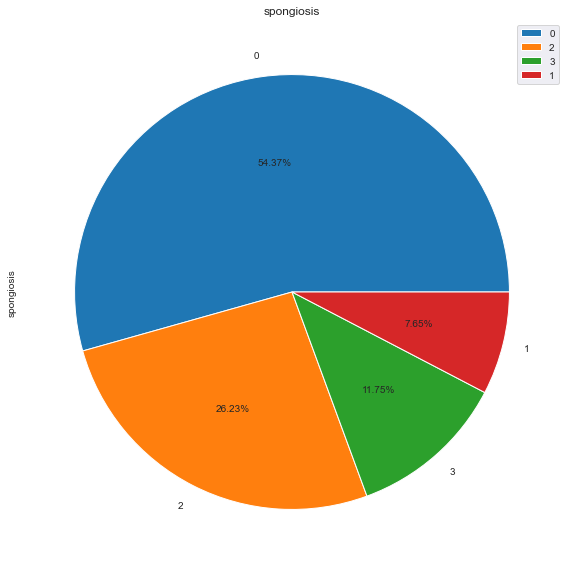

Frequency bar plot and pie chart for saw-tooth_appearance_of_retes: 




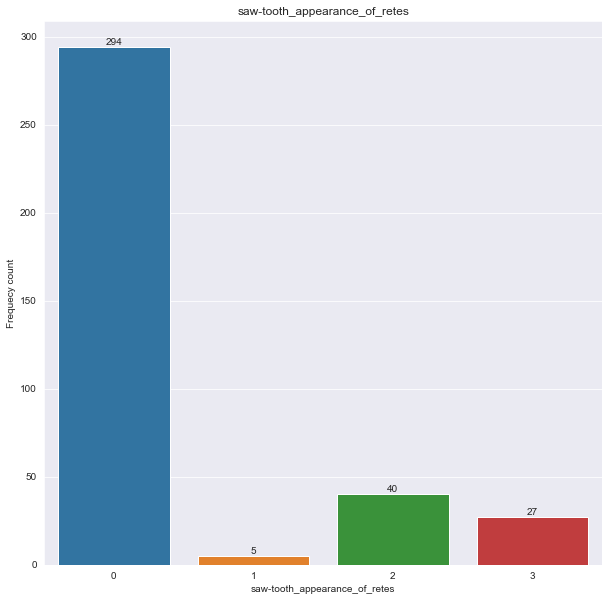

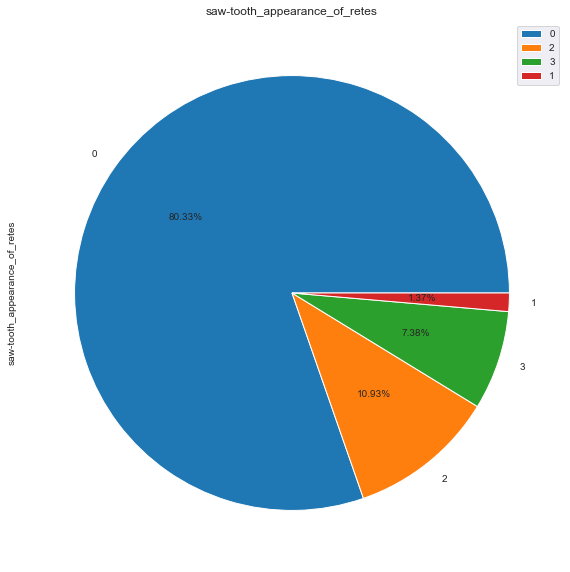

Frequency bar plot and pie chart for follicular_horn_plug: 




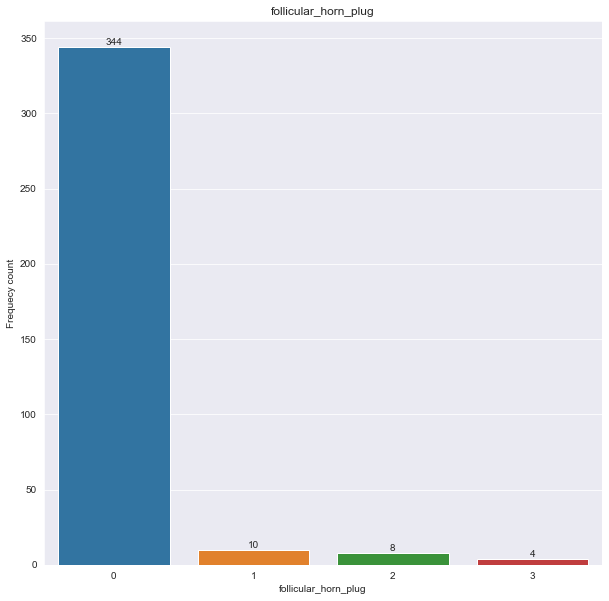

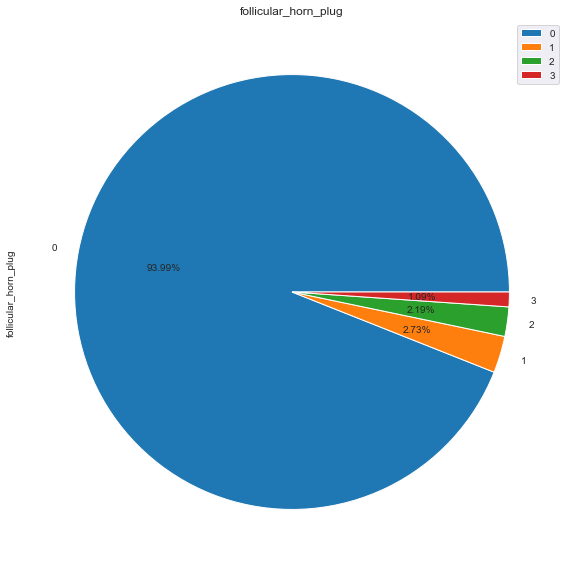

Frequency bar plot and pie chart for perifollicular_parakeratosis: 




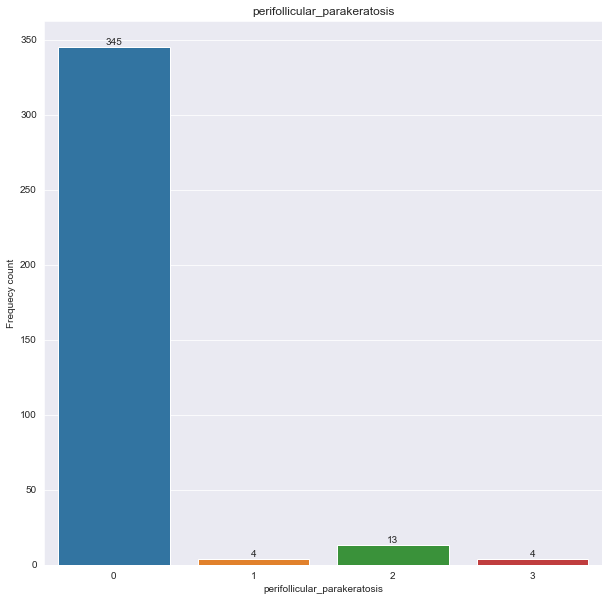

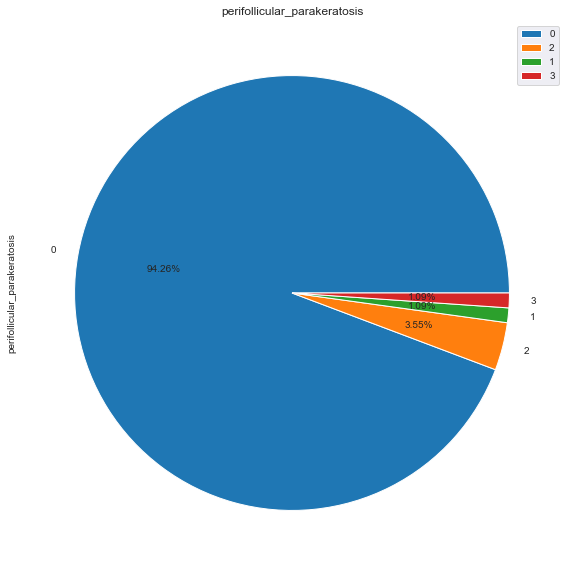

Frequency bar plot and pie chart for inflammatory_monoluclear_inflitrate: 




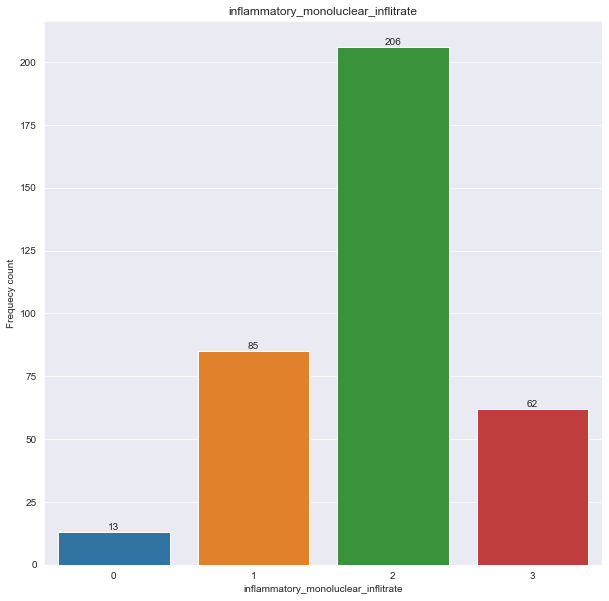

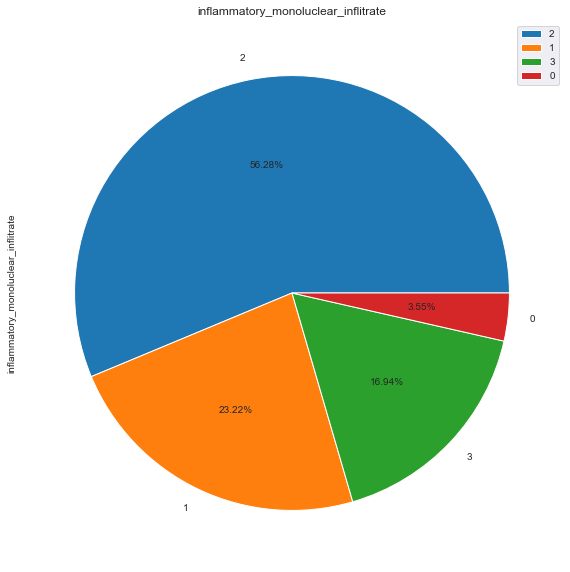

Frequency bar plot and pie chart for band-like_infiltrate: 




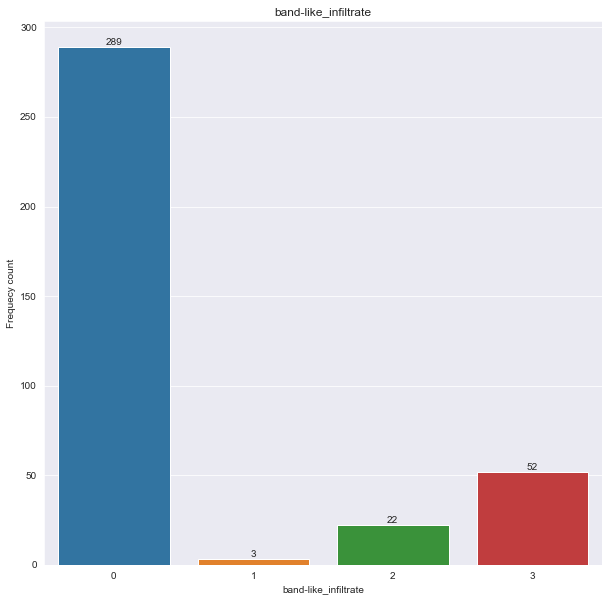

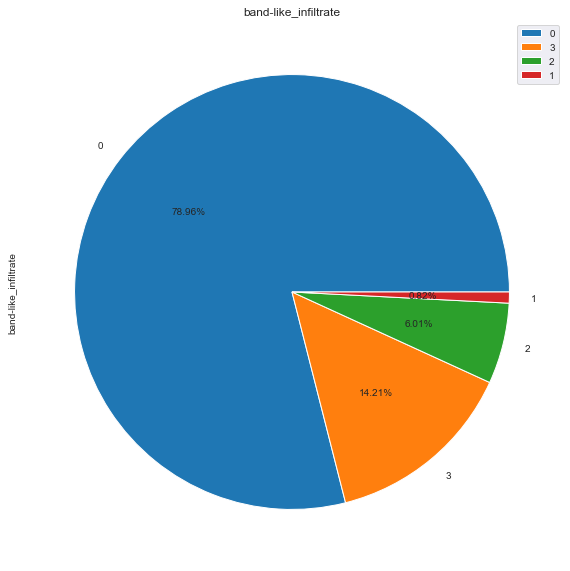

Frequency bar plot and pie chart for class: 




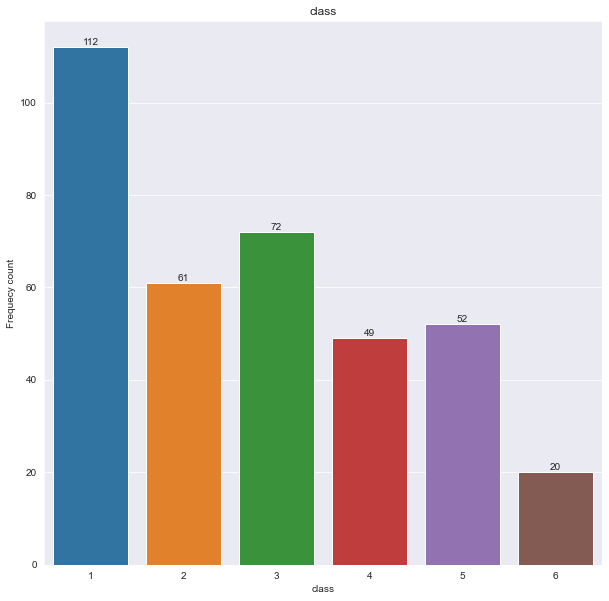

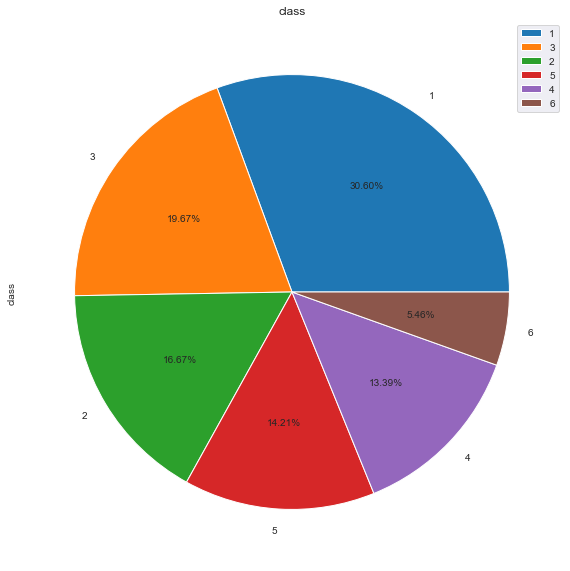

In [13]:
for y in df.drop('Age', axis = 1).columns:
    
    print(f'Frequency bar plot and pie chart for {y}: ')
    
    ax = sns.countplot(df[y])
    
    for v in ax.containers:
        ax.bar_label(v)
        
    plt.ylabel('Frequecy count')
    plt.title(f'{y}')
    print('\n')
    plt.show()
    
    df[y].value_counts().plot(kind = 'pie', autopct = '%.2f%%')
    plt.title(f'{y}')
    plt.legend()
    print('\n')
    plt.show()

### The general distributions of the discrete variables can be seen and infered from above...

## Analysis of Age

Skewness of Age variable: 0.07385603605688307.
Kurtosis of Age variable: -0.663707402991339.


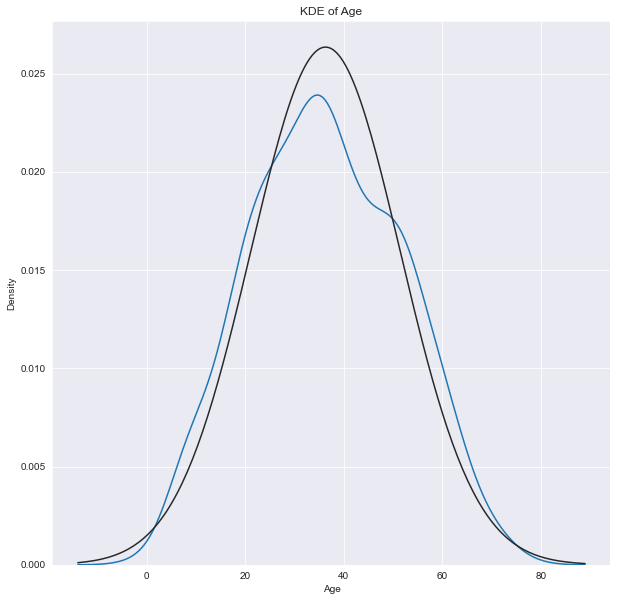

In [14]:
sns.distplot(df['Age'], hist = False, fit = norm)
print(f'Skewness of Age variable: {skew(df.Age)}.')
print(f'Kurtosis of Age variable: {kurtosis(df.Age)}.')
plt.title('KDE of Age')
plt.show()

### The distribution of Age closely resembles the normal distribution as indicated by the distrubution plot and the values of skewness and kurtosis.

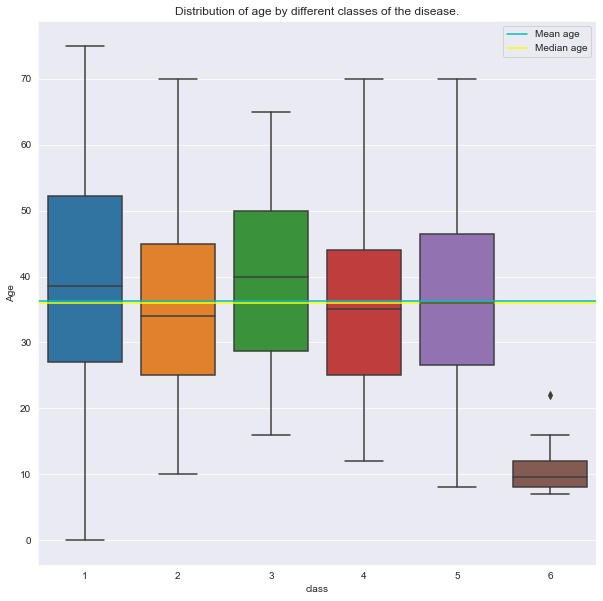

In [15]:
sns.boxplot(x = 'class', y = 'Age', data = df)
plt.axhline(df['Age'].mean(), color = 'c', label = 'Mean age')
plt.axhline(df['Age'].median(), color = 'yellow', label = 'Median age')
plt.title('Distribution of age by different classes of the disease.')
plt.legend()
plt.show()

### Therfore both mean and median age lie closeby. Also, it is clear from above that only for class 1 and class 3 the median age is above the overall mean and median of the Age variable. 

## Model Building

In [16]:
df['Age'] = Normalizer().fit_transform(df.loc[:,['Age']])
df

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,1.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,1.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,1.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,1.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,1.0,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,1.0,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,1.0,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,1.0,3


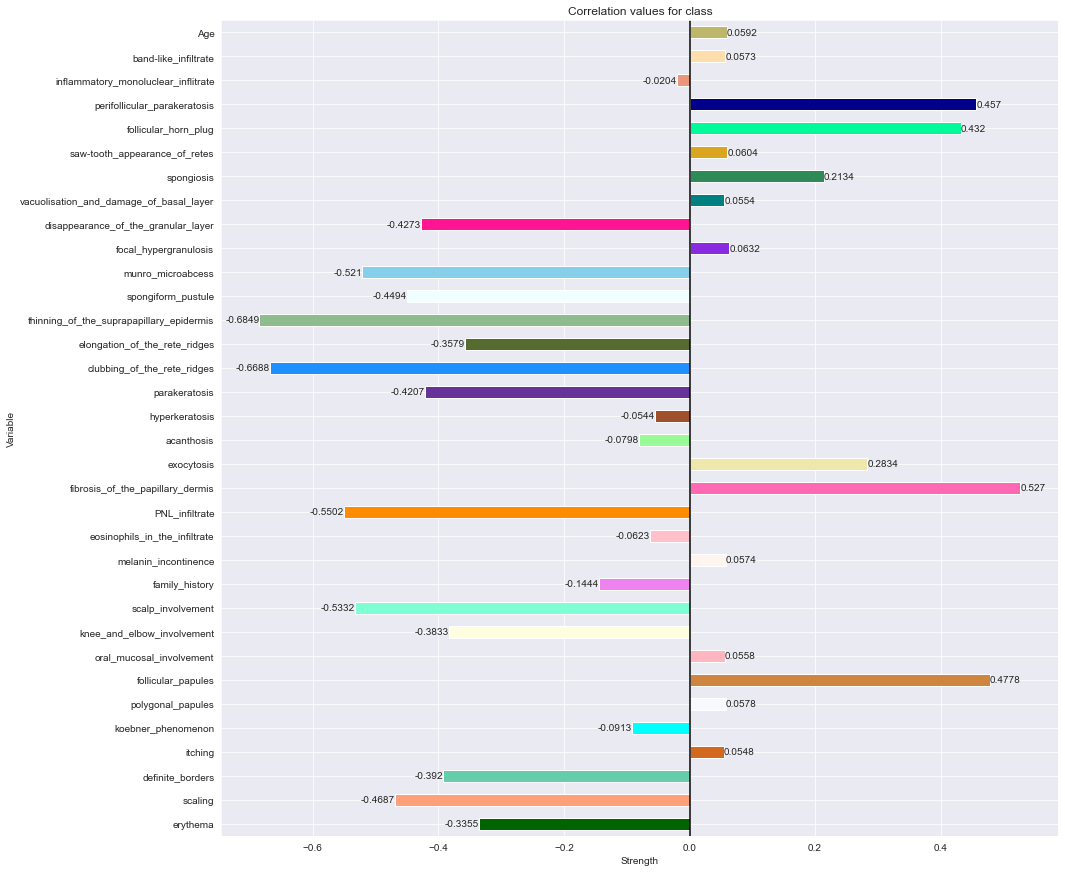

In [17]:
plt.figure(figsize = (15,15))

colors = sample([k for k,v in pltc.cnames.items()], len(df.drop('class',axis=1).columns))

ax = np.round(df.drop('class', axis = 1).corrwith(df['class']), 4).plot(kind = 'barh', color = colors)

for e in ax.containers:
    ax.bar_label(e)
    
plt.axvline(x = 0, color = 'black')
plt.title('Correlation values for class')
plt.xlabel('Strength')
plt.ylabel('Variable')
plt.show()

In [18]:
print('Therefore the features which are most impactful for a particular skin disorder for all classes are:')

for c,d in enumerate(df.drop('class',axis = 1).columns):
    print(f'{c}) {d}')

Therefore the features which are most impactful for a particular skin disorder for all classes are:
0) erythema
1) scaling
2) definite_borders
3) itching
4) koebner_phenomenon
5) polygonal_papules
6) follicular_papules
7) oral_mucosal_involvement
8) knee_and_elbow_involvement
9) scalp_involvement
10) family_history
11) melanin_incontinence
12) eosinophils_in_the_infiltrate
13) PNL_infiltrate
14) fibrosis_of_the_papillary_dermis
15) exocytosis
16) acanthosis
17) hyperkeratosis
18) parakeratosis
19) clubbing_of_the_rete_ridges
20) elongation_of_the_rete_ridges
21) thinning_of_the_suprapapillary_epidermis
22) spongiform_pustule
23) munro_microabcess
24) focal_hypergranulosis
25) disappearance_of_the_granular_layer
26) vacuolisation_and_damage_of_basal_layer
27) spongiosis
28) saw-tooth_appearance_of_retes
29) follicular_horn_plug
30) perifollicular_parakeratosis
31) inflammatory_monoluclear_inflitrate
32) band-like_infiltrate
33) Age


In [19]:
x = df.drop('class',axis = 1)
y = df.loc[:,['class']]

resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
x, y = resample.fit_resample(x, y)

In [20]:
model_lr = LogisticRegression()
model_knn = KNeighborsClassifier()

model_svr = SVC()
model_dt = DecisionTreeClassifier()

model_rf = RandomForestClassifier()
model_gbr = GradientBoostingClassifier()

model_xgb = xgboost.XGBClassifier(eval_metric = 'merror')
model_xgbrf = xgboost.XGBRFClassifier(eval_metric = 'merror')

model_abr = AdaBoostClassifier()
model_etr = ExtraTreesClassifier()

model_hgr = HistGradientBoostingClassifier()
model_lgb = lgbm.LGBMClassifier()

In [21]:
l_model = [model_lr, model_knn, model_svr, model_dt, model_rf, model_gbr, model_xgbrf, model_xgb, model_abr, model_etr, model_hgr, model_lgb]
l_acc = []
l_std = []
l_cv = []
l_exe_time = []

for j in l_model:
    start_time = time.time()
    l_acc.append(cross_val_score(j, x,y).mean())
    l_std.append(cross_val_score(j, x,y).std())
    l_cv.append(cross_val_score(j, x,y).std()/cross_val_score(j, x,y).mean())
    l_exe_time.append(time.time() - start_time)

df_i = pd.DataFrame(data=[l_acc, l_std, l_cv, l_exe_time]).T
df_i.columns = ['Accuracy','Std_Deviation','COV','Execution_Time_Sec']
df_i.index = ['LogisticRegression()','KNeighborsClassifier()','SVC()','DecisionTreeClassifier()','RandomForestClassifier()',
              'GradientBoostingClassifier()','XGBRFClassifier()','XGBClassifier()','AdaBoostClassifier()','ExtraTreesClassifier()',
              'HistGradientBoostingClassifier()','LGBMClassifier()']
df_acc = df_i
df_acc

,Accuracy,Std_Deviation,COV,Execution_Time_Sec
LogisticRegression(),0.985152,0.012388,0.012575,1.030301
KNeighborsClassifier(),0.983659,0.010896,0.011077,0.203529
SVC(),0.980685,0.012036,0.012273,0.296534
DecisionTreeClassifier(),0.968789,0.015210,0.016952,0.100046
RandomForestClassifier(),0.988126,0.008900,0.011209,2.755712
GradientBoostingClassifier(),0.976208,0.020732,0.021237,15.269646
XGBRFClassifier(),0.985141,0.006601,0.006700,5.070070
XGBClassifier(),0.991100,0.008637,0.008714,3.996436
AdaBoostClassifier(),0.395533,0.085901,0.217179,1.972108
ExtraTreesClassifier(),0.992593,0.005926,0.005579,3.063913


In [22]:
print(f'Total excecution time {(df_acc.Execution_Time_Sec.sum())/60} minutes.')

Total excecution time 1.6719605008761087 minutes.


## Model Evaluations

In [23]:
def get_best_3_models(df_acc):
    
    print('Best model in terms of accuracy: ')
    
    print(f'Index: {[np.where(df_acc.Accuracy == sorted(list(df_acc.Accuracy))[-1])[0][0], np.where(df_acc.Accuracy == sorted(list(df_acc.Accuracy))[-2])[0][0], np.where(df_acc.Accuracy == sorted(list(df_acc.Accuracy))[-3])[0][0]]}')
    print(f'Model: {[df_acc.iloc[np.where(df_acc.Accuracy == sorted(list(df_acc.Accuracy))[-1])].index[0], df_acc.iloc[np.where(df_acc.Accuracy == sorted(list(df_acc.Accuracy))[-2])].index[0], df_acc.iloc[np.where(df_acc.Accuracy == sorted(list(df_acc.Accuracy))[-3])].index[0]]}')
    print(f'Accuracy: {[df_acc.iloc[np.where(df_acc.Accuracy == sorted(list(df_acc.Accuracy))[-1])].Accuracy[0],df_acc.iloc[np.where(df_acc.Accuracy == sorted(list(df_acc.Accuracy))[-2])].Accuracy[0],df_acc.iloc[np.where(df_acc.Accuracy == sorted(list(df_acc.Accuracy))[-3])].Accuracy[0]]}')
    print(f'COV: {[df_acc.iloc[np.where(df_acc.Accuracy == sorted(list(df_acc.Accuracy))[-1])].COV[0],df_acc.iloc[np.where(df_acc.Accuracy == sorted(list(df_acc.Accuracy))[-2])].COV[0],df_acc.iloc[np.where(df_acc.Accuracy == sorted(list(df_acc.Accuracy))[-3])].COV[0]]}')
    
    print('\n')
    
    print('Best model in terms of COV: ')
    
    print(f'Index: {[np.where(df_acc.COV == sorted(list(df_acc.COV))[0])[0][0],np.where(df_acc.COV == sorted(list(df_acc.COV))[1])[0][0],np.where(df_acc.COV == sorted(list(df_acc.COV))[2])[0][0]]}')
    print(f'Model: {[df_acc.iloc[np.where(df_acc.COV == sorted(list(df_acc.COV))[0])].index[0],df_acc.iloc[np.where(df_acc.COV == sorted(list(df_acc.COV))[1])].index[0],df_acc.iloc[np.where(df_acc.COV == sorted(list(df_acc.COV))[2])].index[0]]}')
    print(f'Accuracy: {[df_acc.iloc[np.where(df_acc.COV == sorted(list(df_acc.COV))[0])].Accuracy[0],df_acc.iloc[np.where(df_acc.COV == sorted(list(df_acc.COV))[1])].Accuracy[0],df_acc.iloc[np.where(df_acc.COV == sorted(list(df_acc.COV))[2])].Accuracy[0]]}')
    print(f'COV: {[df_acc.iloc[np.where(df_acc.COV == sorted(list(df_acc.COV))[0])].COV[0],df_acc.iloc[np.where(df_acc.COV == sorted(list(df_acc.COV))[1])].COV[0],df_acc.iloc[np.where(df_acc.COV == sorted(list(df_acc.COV))[2])].COV[0]]}')

    
def get_worst_3_models(df_acc):
    
    print('Worst model in terms of accuracy: ')
    
    print(f'Index: {[np.where(df_acc.Accuracy == sorted(list(df_acc.Accuracy))[0])[0][0],np.where(df_acc.Accuracy == sorted(list(df_acc.Accuracy))[1])[0][0],np.where(df_acc.Accuracy == sorted(list(df_acc.Accuracy))[2])[0][0]]}')
    print(f'Model: {[df_acc.iloc[np.where(df_acc.Accuracy == sorted(list(df_acc.Accuracy))[0])].index[0],df_acc.iloc[np.where(df_acc.Accuracy == sorted(list(df_acc.Accuracy))[1])].index[0],df_acc.iloc[np.where(df_acc.Accuracy == sorted(list(df_acc.Accuracy))[2])].index[0]]}')
    print(f'Accuracy: {[df_acc.iloc[np.where(df_acc.Accuracy == sorted(list(df_acc.Accuracy))[0])].Accuracy[0],df_acc.iloc[np.where(df_acc.Accuracy == sorted(list(df_acc.Accuracy))[1])].Accuracy[0],df_acc.iloc[np.where(df_acc.Accuracy == sorted(list(df_acc.Accuracy))[2])].Accuracy[0]]}')
    print(f'COV: {[df_acc.iloc[np.where(df_acc.Accuracy == sorted(list(df_acc.Accuracy))[0])].COV[0],df_acc.iloc[np.where(df_acc.Accuracy == sorted(list(df_acc.Accuracy))[1])].COV[0],df_acc.iloc[np.where(df_acc.Accuracy == sorted(list(df_acc.Accuracy))[2])].COV[0]]}')
    
    print('\n')
    
    print('Worst model in terms of COV: ')
    
    print(f'Index: {[np.where(df_acc.COV == sorted(list(df_acc.COV))[-1])[0][0],np.where(df_acc.COV == sorted(list(df_acc.COV))[-2])[0][0],np.where(df_acc.COV == sorted(list(df_acc.COV))[-3])[0][0]]}')
    print(f'Model: {[df_acc.iloc[np.where(df_acc.COV == sorted(list(df_acc.COV))[-1])].index[0],df_acc.iloc[np.where(df_acc.COV == sorted(list(df_acc.COV))[-2])].index[0],df_acc.iloc[np.where(df_acc.COV == sorted(list(df_acc.COV))[-3])].index[0]]}')
    print(f'Accuracy: {[df_acc.iloc[np.where(df_acc.COV == sorted(list(df_acc.COV))[-1])].Accuracy[0],df_acc.iloc[np.where(df_acc.COV == sorted(list(df_acc.COV))[-2])].Accuracy[0],df_acc.iloc[np.where(df_acc.COV == sorted(list(df_acc.COV))[-3])].Accuracy[0]]}')
    print(f'COV: {[df_acc.iloc[np.where(df_acc.COV == sorted(list(df_acc.COV))[-1])].COV[0],df_acc.iloc[np.where(df_acc.COV == sorted(list(df_acc.COV))[-2])].COV[0],df_acc.iloc[np.where(df_acc.COV == sorted(list(df_acc.COV))[-3])].COV[0]]}')

In [24]:
get_best_3_models(df_acc)

Best model in terms of accuracy: 
Index: [9, 10, 7]
Model: ['ExtraTreesClassifier()', 'HistGradientBoostingClassifier()', 'XGBClassifier()']
Accuracy: [0.9925925925925926, 0.9925815367606411, 0.9911000552791597]
COV: [0.005579256475178383, 0.006674941304487052, 0.008714134605800753]


Best model in terms of COV: 
Index: [9, 10, 6]
Model: ['ExtraTreesClassifier()', 'HistGradientBoostingClassifier()', 'XGBRFClassifier()']
Accuracy: [0.9925925925925926, 0.9925815367606411, 0.9851409618573796]
COV: [0.005579256475178383, 0.006674941304487052, 0.00670030847813454]


In [25]:
get_worst_3_models(df_acc)

Worst model in terms of accuracy: 
Index: [8, 3, 5]
Model: ['AdaBoostClassifier()', 'DecisionTreeClassifier()', 'GradientBoostingClassifier()']
Accuracy: [0.39553344389165285, 0.9687893864013265, 0.9762078496406854]
COV: [0.21717859638048517, 0.016951640114413743, 0.02123708642109619]


Worst model in terms of COV: 
Index: [8, 5, 3]
Model: ['AdaBoostClassifier()', 'GradientBoostingClassifier()', 'DecisionTreeClassifier()']
Accuracy: [0.39553344389165285, 0.9762078496406854, 0.9687893864013265]
COV: [0.21717859638048517, 0.02123708642109619, 0.016951640114413743]


### Any of the models (except AdaBoostClassifier( )) can be applied on this dataset to make an accurate prediction of the disorder in hand. However, it should be taken into account that the model should have a low coefficient of variation in addition to high accuracy which ensures that the value of accuracy of the model does not fluctuate much with respect to the mean accuracy of the model. Therefore conider the following:

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42)

model_lr.fit(x_train, y_train)

y_predict = model_lr.predict(x_test)

print(f'Accuracy score: {accuracy_score(y_test, y_predict)}.\n')
print(f'Confusion Matrix:\n\n {confusion_matrix(y_test, y_predict)}.\n')
print(f'Classification Report:\n\n {classification_report(y_test, y_predict)}.')

Accuracy score: 0.9880952380952381.

Confusion Matrix:

 [[31  0  0  0  0  0]
 [ 0 21  0  0  0  0]
 [ 0  0 30  0  0  0]
 [ 0  2  0 29  0  0]
 [ 0  0  0  0 23  0]
 [ 0  0  0  0  0 32]].

Classification Report:

               precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.91      1.00      0.95        21
           3       1.00      1.00      1.00        30
           4       1.00      0.94      0.97        31
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        32

    accuracy                           0.99       168
   macro avg       0.99      0.99      0.99       168
weighted avg       0.99      0.99      0.99       168
.


In [27]:
z = x_test.sample(1) # This will randomly select value with a given index from the test input set.
z

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age
625,2,2,1,1,0,0,1,0,1,0,...,0,0,0,1,0,1,1,1,0,1.0


In [28]:
y_test.iloc[[np.where(y_test.index == z.index[0])[0][0]],:] # This is the actual class of the disease...

,class
625,6


In [29]:
model_lr.predict(z.values.tolist()) # Predicted class of the disease...

array([6], dtype=int64)

In [30]:
model_lr.predict(z.values.tolist()) == y_predict[np.where(y_test.index == z.index[0])[0][0]]

array([ True])

#### Therefore the model has predicted the same class as the actual value for the given characteristics. So, the model is able to make the predictions correctly! Similarly, any other model from the table of df_acc can be used to make predictions for the above scenario. 